# Strojové učenie

Filip Mačina - 50% | Filip Remšík - 50%

In [1]:
from IPython.display import Image
import pandas as pd
import matplotlib as mat
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.stats as sm_stats
from datetime import datetime, date
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler ,MinMaxScaler, PowerTransformer, QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG
from IPython.display import HTML
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import svm


import os
os.environ["PATH"] += os.pathsep + 'C:/Users/42190/Desktop/Graphviz/bin'

# Načítanie dát

In [2]:
filename = ('../2nd-phase/train_data_gaus.csv')
train_data = pd.read_csv(filename, sep=',')
filename = ('../2nd-phase/test_data.csv')
test_data = pd.read_csv(filename, sep=',')

test_data=test_data.drop(test_data.columns[0],axis=1)
train_data=train_data.drop(train_data.columns[0],axis=1)

In [3]:
train_data.columns

Index(['warning', 'PM10', 'PM2.5', 'NOx', 'H2CO', 'C2H3NO5', 'SO2', 'CH4',
       'Pb', 'NH3', 'CO', 'TEMP', 'PAHs', 'PRES', 'O3', 'CFCs', 'area_1',
       'area_2', 'area_3', 'area_4', 'area_5', 'area_6', 'area_7'],
      dtype='object')

In [4]:
train_data = train_data.drop(train_data.columns[16:], axis=1)

Trénovacie dáta po fáze 2 mali v sebe stĺpce area. Tie k strojovému učeniu nepotrebujeme tak sme ich odstránili.

In [5]:
train_data.describe()

,warning,PM10,PM2.5,NOx,H2CO,C2H3NO5,SO2,CH4,Pb,NH3,CO,TEMP,PAHs,PRES,O3,CFCs
count,9595.000000,9.595000e+03,9.595000e+03,9.595000e+03,9.595000e+03,9.595000e+03,9.595000e+03,9.595000e+03,9.595000e+03,9.595000e+03,9.595000e+03,9.595000e+03,9.595000e+03,9.595000e+03,9.595000e+03,9.595000e+03
mean,0.600313,-4.943067e-16,-1.451447e-16,2.088307e-16,-1.962416e-17,8.886413e-18,-7.075806e-16,-1.880957e-16,-2.240116e-16,-5.389239e-16,5.735439e-16,2.369710e-17,6.620377e-16,-1.369248e-15,4.813473e-16,2.186428e-16
std,0.489860,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00
min,0.000000,-2.563869e+00,-2.687278e+00,-3.460098e+00,-2.796863e+00,-8.233825e+00,-2.725410e+00,-3.378176e+00,-2.718468e+00,-2.720930e+00,-2.770894e+00,-2.758618e+00,-3.128105e+00,-1.747585e+00,-2.864686e+00,-2.765679e+00
25%,0.000000,-6.477000e-01,-6.779047e-01,-7.061368e-01,-6.760918e-01,-5.337126e-01,-6.745715e-01,-6.734304e-01,-6.812339e-01,-6.648630e-01,-7.445954e-01,-6.728104e-01,-6.645797e-01,-8.519851e-01,-7.681104e-01,-6.811863e-01
50%,1.000000,2.010467e-03,1.119778e-02,-4.175791e-02,6.000367e-03,6.360127e-02,-4.562690e-03,-3.232672e-02,-5.752882e-03,2.604339e-06,3.427687e-02,-1.679648e-03,-2.858847e-02,-6.033657e-04,7.460829e-02,6.058237e-04
75%,1.000000,6.494769e-01,6.798803e-01,7.372839e-01,6.719348e-01,4.901019e-01,6.806837e-01,6.758102e-01,6.737491e-01,6.728788e-01,7.377404e-01,6.750053e-01,6.492159e-01,8.724062e-01,7.190878e-01,6.823995e-01
max,1.000000,2.612143e+00,2.696754e+00,2.549769e+00,2.701491e+00,2.039044e+00,2.682117e+00,2.302125e+00,2.678211e+00,2.650052e+00,3.091088e+00,2.687483e+00,2.351776e+00,1.712569e+00,3.057075e+00,2.697514e+00


In [6]:
test_data.columns

Index(['warning', 'PM10', 'PM2.5', 'NOx', 'H2CO', 'C2H3NO5', 'SO2', 'CH4',
       'Pb', 'NH3', 'CO', 'TEMP', 'PAHs', 'PRES', 'O3', 'CFCs', 'area'],
      dtype='object')

In [7]:
test_data = test_data.drop(['area'], axis=1)

Stĺpec area sme odstránili aj pre testovacie dáta.

In [8]:
test_warning = test_data['warning']

In [9]:
numerical=['PM10', 'PM2.5', 'NOx', 'H2CO', 'C2H3NO5', 'SO2','CH4', 'Pb', 'NH3', 'CO', 'TEMP', 'PAHs', 'PRES', 'O3','CFCs']
skewed=['C2H3NO5']

quantileTransformer = QuantileTransformer(output_distribution="normal",n_quantiles=1000)
powerTransformer = PowerTransformer(method='yeo-johnson', standardize=True) 

preprocessing_ppl1 = ColumnTransformer(
    transformers=[
    ("qt", quantileTransformer, skewed),
    ("pt", powerTransformer, numerical)
])

pipeline = Pipeline([
    ("comlete", preprocessing_ppl1)
])

pipeline_out = pipeline.fit_transform(test_data)

pipeline_out_df = pd.DataFrame(pipeline_out)
test_data = pipeline_out_df.drop(pipeline_out_df.columns[0], axis=1)
test_data.insert(0, 'warning', test_warning)
test_data.head()

,warning,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,-0.359065,0.088246,0.825762,0.226056,-1.680806,1.003975,0.086448,-2.576991,1.871037,0.042877,-0.239117,-0.125902,-0.943473,1.328268,-1.330519
1,0.0,-0.486853,-1.036993,0.460973,0.743098,0.008559,2.287253,0.048885,0.558369,-1.629562,-0.299453,0.513436,-0.068183,0.068405,-0.923224,0.246439
2,1.0,0.507379,-0.612212,-1.490201,-0.685076,0.910943,-0.459512,-0.189689,0.965293,-1.151067,0.444383,1.042968,-1.098929,-0.710687,-0.864938,-0.446220
3,1.0,0.861802,1.414685,0.257225,-0.943234,1.279794,0.303033,0.760559,0.506902,1.370521,-0.250624,-0.073302,-0.649456,-1.396030,-1.624081,-0.027639
4,1.0,0.878074,-0.639234,-0.181115,-0.472842,0.668509,-0.509471,-0.576896,-0.718770,-2.017309,-1.585616,2.273894,0.357311,1.085760,0.085614,-0.279620


Testovacie dáta ešte neboli transformované, tak sme použili pipeline z fázy 2, na to aby sme ich transformovali.

In [10]:
test_data = test_data.set_axis(['warning', 'PM10', 'PM2.5', 'NOx', 'H2CO', 'C2H3NO5', 'SO2','CH4', 'Pb', 'NH3', 'CO', 'TEMP', 'PAHs', 'PRES', 'O3', 'CFCs'], axis='columns')

In [11]:
test_data.describe()

,warning,PM10,PM2.5,NOx,H2CO,C2H3NO5,SO2,CH4,Pb,NH3,CO,TEMP,PAHs,PRES,O3,CFCs
count,2399.000000,2.399000e+03,2.399000e+03,2.399000e+03,2.399000e+03,2.399000e+03,2.399000e+03,2.399000e+03,2.399000e+03,2.399000e+03,2.399000e+03,2.399000e+03,2.399000e+03,2.399000e+03,2.399000e+03,2.399000e+03
mean,0.581909,-7.108389e-17,6.219841e-16,1.095877e-16,6.056940e-16,1.569769e-16,-1.060335e-15,-2.991447e-16,-7.374954e-16,2.784119e-16,-5.079536e-16,1.184732e-16,5.731139e-16,-8.944723e-16,1.680838e-16,3.783736e-16
std,0.493348,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00
min,0.000000,-2.558818e+00,-2.666474e+00,-3.439880e+00,-2.707020e+00,-3.593444e+00,-2.722367e+00,-3.434065e+00,-2.754396e+00,-2.640879e+00,-2.741233e+00,-2.676903e+00,-3.093857e+00,-1.759469e+00,-2.798523e+00,-2.687791e+00
25%,0.000000,-6.352014e-01,-6.604468e-01,-6.924467e-01,-6.964490e-01,-7.099745e-01,-6.573578e-01,-6.486697e-01,-6.565601e-01,-6.772210e-01,-7.539179e-01,-6.616843e-01,-6.604790e-01,-8.591698e-01,-7.705909e-01,-6.733803e-01
50%,1.000000,1.499758e-04,-7.922637e-03,-2.833351e-02,6.547753e-03,-8.287757e-02,-1.164363e-02,-1.762940e-02,4.748010e-03,-3.330749e-03,4.418303e-02,2.406392e-03,-1.924514e-02,5.813328e-03,9.461368e-02,-1.055594e-03
75%,1.000000,6.574265e-01,6.523560e-01,7.104570e-01,6.775417e-01,6.829777e-01,6.894176e-01,6.518579e-01,6.572897e-01,6.613338e-01,7.208694e-01,6.973660e-01,6.439523e-01,8.701187e-01,7.191944e-01,6.636858e-01
max,1.000000,2.649017e+00,2.703103e+00,2.641137e+00,2.560769e+00,1.723387e+00,2.772064e+00,2.391420e+00,2.696116e+00,2.689894e+00,3.127928e+00,2.677231e+00,2.332563e+00,1.713310e+00,3.039911e+00,2.695894e+00


Po transformácií bolo treba ešte pomenovať stĺpce.

***

# OneR

In [12]:
oneR_train_data = train_data.copy()

In [13]:
scores = {}
prediction_values = {}

# calculate scores for each feature
for col in oneR_train_data[numerical].columns:
    # split the data into features and labels
    X = oneR_train_data[col].values
    y = oneR_train_data['warning'].values
    split = (oneR_train_data[col][oneR_train_data['warning'] == 0].mean() +
             oneR_train_data[col][oneR_train_data['warning'] == 1].mean())/2

    # apply the oneR algorithm to make predictions
    predictions = []
    for x in X:
        if x >= split:
            predictions.append(0)
        else:
            predictions.append(1)

    # calculate the scores
    accuracy = accuracy_score(y, predictions)
    precision = precision_score(y, predictions)
    recall = recall_score(y, predictions)

    # scores
    scores[col] = (accuracy, precision, recall)
    prediction_values[col] = predictions
    print(col, " ", ((accuracy + precision + recall) / 3), " | ", split)
    
# select the feature with the highest score
best_feature = max(scores, key=lambda k: scores[k][0] + scores[k][1] + scores[k][2])    

X = oneR_train_data[best_feature].values
print("best: ", best_feature)
# print(prediction_values[best_feature])

PM10   0.5420764164602816  |  0.004315036393626024
PM2.5   0.5257919439907782  |  -0.0022609051843147914
NOx   0.8400868223650463  |  0.13287488633801214
H2CO   0.5226010970196853  |  -0.0049023962113602035
C2H3NO5   0.5300851040604934  |  0.0038553729114227274
SO2   0.5277775844378175  |  -0.002379646409505792
CH4   0.3984102634536327  |  -0.06619698674954089
Pb   0.5376712179688007  |  0.0017368600860670764
NH3   0.5317552241948555  |  -1.1057780335421672e-05
CO   0.5630168379015666  |  -0.00039307733676107164
TEMP   0.535215070901767  |  -0.0005648203223999834
PAHs   0.6760585455622068  |  0.06590676354388816
PRES   0.5376527163974681  |  -0.00027387485673605104
O3   0.6723297291468455  |  0.07285392572070801
CFCs   0.5388431221321222  |  0.003254397594128453
best:  NOx


***

# Decision Tree

In [14]:
features = ['NOx', 'CH4', 'PAHs', 'O3', 'PM10',]

decision_tree = DecisionTreeClassifier()

train_labels = train_data['warning']
validation_labels = test_data['warning']

train_features = train_data[features]
test_features = test_data[features]

decision_tree = decision_tree.fit(train_features, train_labels)

In [15]:
print('Training accuracy: ', decision_tree.score(train_features, train_labels))
print('Test Accuracy: ', decision_tree.score(test_features, validation_labels))

Training accuracy:  1.0
Test Accuracy:  0.8695289704043352


In [16]:
predicted_labels = decision_tree.predict(test_features)

In [17]:
print("Accuracy: ", accuracy_score(validation_labels, predicted_labels))
print("Precision: ", precision_score(validation_labels, predicted_labels))
print("Recall: ", recall_score(validation_labels, predicted_labels))

Accuracy:  0.8695289704043352
Precision:  0.8821453775582216
Recall:  0.8954154727793696


In [18]:
print(classification_report(validation_labels, predicted_labels, target_names = ["0","1"]))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1003
           1       0.88      0.90      0.89      1396

    accuracy                           0.87      2399
   macro avg       0.87      0.86      0.87      2399
weighted avg       0.87      0.87      0.87      2399



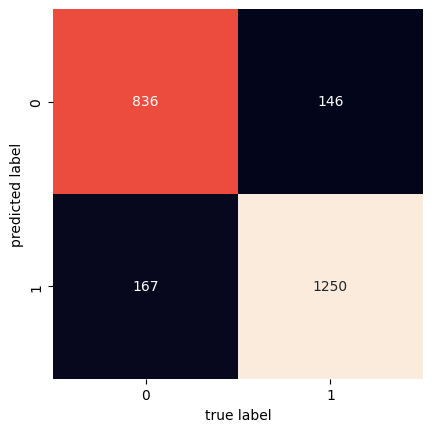

In [19]:
mat = confusion_matrix(validation_labels, predicted_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

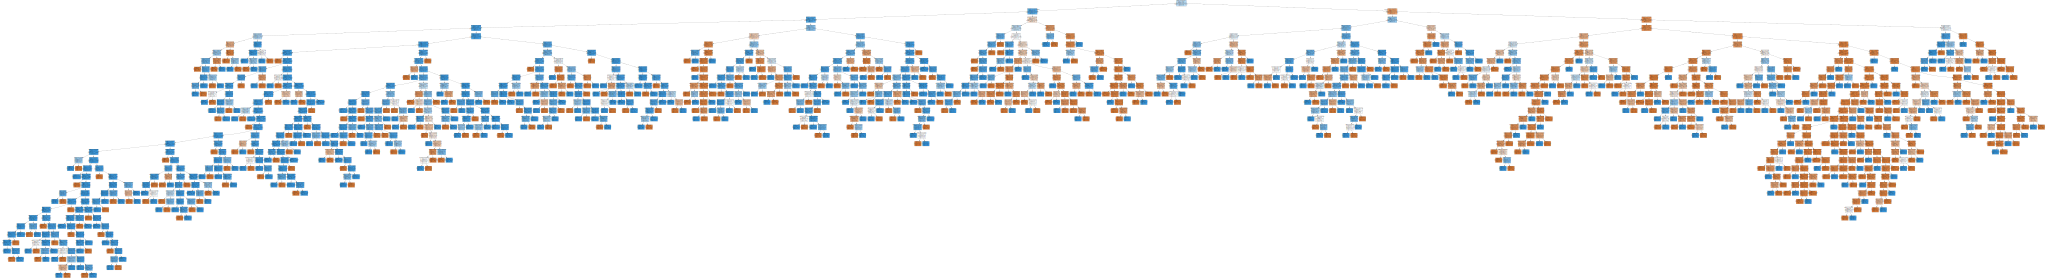

In [20]:
graph = Source(export_graphviz(decision_tree, 
                               out_file=None,
                               feature_names=test_features.columns,
                               class_names=['0', '1'],
                               filled = True))

display(SVG(graph.pipe(format='svg')))
style = "<style>svg{width:10% !important;height:10% !important;}</style>"
HTML(style)

# graph.format = 'png'
# graph.render('tree_render',view=False)
# Image(filename='tree_render.png') 

***

# Decision Tree - Hyperparamer Tuning

**Hyperparametre**

- criterion - funkcia na zhodnotenie kvality rozdelenia
- max_depth - maximálna hĺbka stromu
- min_samples_split - určuje minimálny počet prvkov na rozdelenie vetvy
- min_samples_leaf - určuje minimálny počet prvkov potrebných na liste

In [21]:
parameters = {'criterion': ('gini','entropy'),
             "max_depth": range(1,10),
             "min_samples_split": range(2,10),
             "min_samples_leaf": range(1,5)}

**Grid Search**

Využili sme funkciu GridSearchCV na to aby nám vytvorila najlepší model pre určené parametre. Parameter cv určuje počet cross validations.

In [22]:
grid_search = GridSearchCV(decision_tree, 
                            param_grid=parameters,
                            cv=10,
                            verbose=1,
                            n_jobs=-1)

grid_search.fit(train_features, train_labels)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [23]:
params = grid_search.best_params_
params

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [24]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=8, min_samples_leaf=3)

In [25]:
grid_search.best_score_

0.9145392335766424

In [26]:
final_model = grid_search.best_estimator_
final_model

DecisionTreeClassifier(max_depth=8, min_samples_leaf=3)

In [36]:
final_model = final_model.fit(train_features, train_labels)

predicted_labels = final_model.predict(test_features)
decision_accuracy=accuracy_score(validation_labels, predicted_labels)

In [28]:
print("Accuracy: ", accuracy_score(validation_labels, predicted_labels))
print("Precision: ", precision_score(validation_labels, predicted_labels))
print("Recall: ", recall_score(validation_labels, predicted_labels))

Accuracy:  0.8982909545644019
Precision:  0.8983402489626556
Recall:  0.9305157593123209


***

# Random Forest

In [29]:
forest = RandomForestClassifier(random_state=1)
forest_model = forest.fit(train_features, train_labels)
predicted_labels = forest_model.predict(test_features)

print("Accuracy: ", accuracy_score(validation_labels, predicted_labels))
print("Precision: ", precision_score(validation_labels, predicted_labels))
print("Recall: ", recall_score(validation_labels, predicted_labels))

Accuracy:  0.9208003334722801
Precision:  0.9135802469135802
Recall:  0.9541547277936963


**Hyperparametre**

- n_estimators - počet stromov v stromovom klasifikátore
- max_depth - maximálna hĺbka stromu
- min_samples_split - určuje minimálny počet prvkov na rozdelenie vetvy
- min_samples_leaf - určuje minimálny počet prvkov potrebných na liste

In [30]:
n_estimators = [100, 200, 300]
max_depth = [5, 10, 20, 30, 40, 50]
min_samples_split = [2, 5, 10, 15, 20]
min_samples_leaf = [1, 2, 5, 10] 

hyper = dict(n_estimators = n_estimators, 
             max_depth = max_depth,  
             min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf
            )
gs = GridSearchCV(forest, hyper, cv=3, verbose=1, n_jobs=-1)

best = gs.fit(train_features, train_labels)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


In [31]:
gs.best_params_

{'max_depth': 40,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [32]:
gs.best_estimator_

RandomForestClassifier(max_depth=40, n_estimators=300, random_state=1)

In [33]:
gs.best_score_

0.9320485483691975

In [34]:
random_forest_final_model = gs.best_estimator_

forest_model_hyperparameter = random_forest_final_model.fit(train_features, train_labels)
predicted_labels = forest_model_hyperparameter.predict(test_features)
random_accuracy=accuracy_score(validation_labels, predicted_labels)

print("Accuracy: ", accuracy_score(validation_labels, predicted_labels))
print("Precision: ", precision_score(validation_labels, predicted_labels))
print("Recall: ", recall_score(validation_labels, predicted_labels))

Accuracy:  0.9237182159233014
Precision:  0.9185645272601795
Recall:  0.9534383954154728


Vidíme, že náš natrénovaný Random Forest klasifikátor je presnejší ako Decision Tree klasifikátor. Vlastne implementovaný OneR algoritmus, je najmenej presný z týchto troch klasifikátorov.

***

# Vyhodnotenie vplyvu zvolenej stratégie riešenia na klasifikáciu

## Riešenie chýbajúcich hodnôt a outlierov

Pri chýbajúcich hodnotách sme skúšali viaceré metódy. Prvou bolo odtraňovanie nulových hodnôt, čo ale malo za dôsledok ostránenie viacerých dát a zhoršenie kolerácie. Po testovaní s mediánom a priemerom sme sa zhodli, že tieto metódy sú pre náš dataset lepšie.
Outlerov sme riešili formou kvantilov, pričom kvantilové rozpätie sme mali navolené tak, aby sa dáta viac podobali gausovmu rozdelenie ale zároveň sme chceli docieliť zbytočnému odstraňovaniu dát. 

## Scaling / transformer

Úprava dát prebiehala cez Standart Scaler, Power A Quantile Transformer. Pomocou týchto funcií sme upravili dáta, aby mali lepšie normálne rozdelenie pre strojové učenie. Na základe výsledkov strojového učenia môžeme vidieť, že kombinácia viacerých funkcií bola prospešná.

## Výber atribútov a algoritmov pre strojové učenie

Náš výber atribútov strojového učenia: NOx, CH4, PAHs, O3, PM10. 
Atribúty sme vyberali na základe výsledku 1R algoritmu a korelácií. Skúšali sme použiť aj menšie množstvo atribútov ale výsledná accuracy sa tým zhoršila.
Na strojové učenie sme sa rozhodli vyskúšať 2 klasifikátory a to Decision Tree a Random Forest.

In [37]:
print('Decision Tree accuracy: ', decision_accuracy,'| Random Forest accuracy: ', random_accuracy)

Decision Tree accuracy:  0.8982909545644019 | Random Forest accuracy:  0.9237182159233014


Na základe porovnaní sme zistili že na trénovanie našich dát je lepší random rorest.

## Hyperparameter tuning

Na základe použitia hyperparameter tuningu a grid searchu sme zistili, že celkovým víťazom pre najlepší algoritmus je aj tak random forest aj napriek tomu, že sa nám výsledky ešte zlepšili.